In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [8]:
df=pd.read_csv("D:/IBM/Machine learning with Python/Datasets/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [12]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A97F1C7780>]],
      dtype=object)

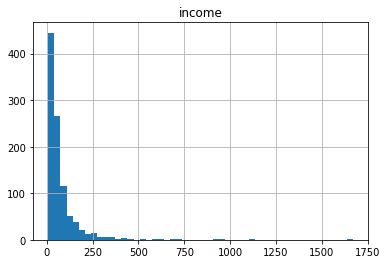

In [14]:
df.hist(column='income', bins=50)

In [15]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [19]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values   
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [20]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print(X_train)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)
[[ 1.19883553 -1.3361669  -1.40879906 ... -0.22207644 -1.03459817
   0.46617787]
 [ 1.19883553 -1.42984754 -0.53248207 ... -0.22207644  0.96655883
   1.85983368]
 [-1.25277087 -1.00828468  0.82182601 ... -0.22207644 -1.03459817
  -0.23065004]
 ...
 [-0.02696767 -1.10196531  0.66249564 ... -0.22207644 -1.03459817
  -0.23065004]
 [ 1.19883553 -0.30567991 -1.2494687  ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553 -1.3361669  -0.85114279 ... -0.22207644 -1.03459817
  -0.92747794]]


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [35]:
print(X_train.dtype.names)

None


In [44]:
y_hat=neigh.predict(X_test)
y_hat[0:5]

array([3, 3, 1, 3, 1], dtype=int64)

In [46]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.565
Test set Accuracy:  0.27


In [47]:
k = 6
#Train model with 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh6

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [50]:
y_hat6=neigh6.predict(X_test)
y_hat6[0:5]

array([3, 2, 1, 3, 1], dtype=int64)

In [52]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat6))

Train set Accuracy:  0.51875
Test set Accuracy:  0.295


In [67]:
Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
mean_acc

array([0.27 , 0.25 , 0.285, 0.27 , 0.32 , 0.295, 0.305, 0.335, 0.33 ])

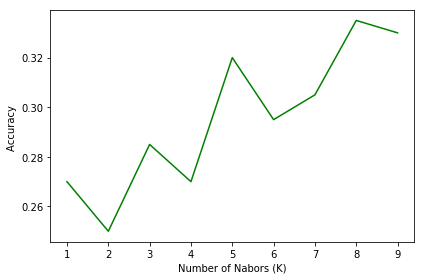

In [68]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [58]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.335 with k= 8


In [62]:
print(mean_acc.argmax())

7


In [63]:
k = 8
#Train Model and Predict 
neigh8 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh8

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [64]:
y_hat8 = neigh8.predict(X_test)
y_hat8[0:5]

array([3, 2, 1, 3, 1], dtype=int64)

In [65]:
print("Train set accuracy: ", metrics.accuracy_score(y_train, neigh8.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test, y_hat8))

Train set accuracy:  0.50875
Test set accuracy:  0.335


NameError: name 'x' is not defined